<a href="https://colab.research.google.com/github/Rijan-Ja-Bhattarai/AI/blob/main/01_PythonWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cpu'

# Create Some Known Data Using Linear Regression

In [120]:
# Create known parameters
weight = 0.7
bias = 0.3

start = 0 # Start from this 0
end = 1 # End at 0
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [121]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

## Splitting the Data

In [122]:
# Create a Test spli
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split]

test_split = int(0.2 * len(X))
X_test = X[train_split: ]
y_test = y[train_split: ]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

## Visualize the Data

In [123]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10, 7))

  # Plot for Training Set
  plt.scatter(train_data, train_labels, c = "blue", s = 4, label = "Training Data")

  # Plot For Testing Set
  plt.scatter(test_data, test_labels, c = "red", s = 4, label = "Test Data")

  # Are there any predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, s = 4, c = "green", label = "Predictions")

  # Show the Legend
  plt.legend(prop = {"size": 14}) # prop stands for properties

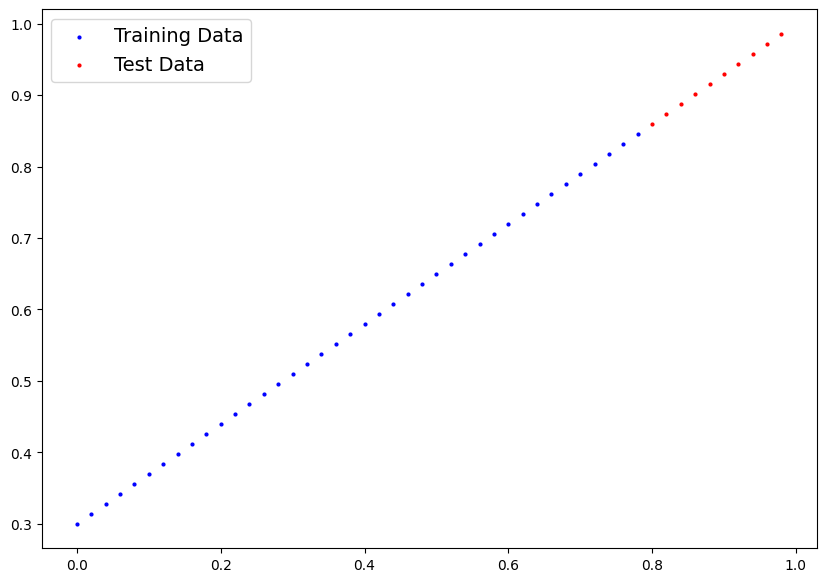

In [124]:
plot_predictions();

# Build The Model

In [125]:
# Create Linear Regression Model Class
class LinearRegressionModel(nn.Module): # <- Base Class for All Neural Networks
    def __init__(self): # Create constructors Class
        super().__init__() # To extend or modify the inherited functions much like override in java
        self.weights = nn.Parameter(torch.randn(1,                    # A kind of module tensor that is to be considered a model parameter
                                                requires_grad = True, # If it requires gradient Descent, Yes because it is a Parameter
                                                dtype = torch.float))

        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True, # Bias is also a Parameter so it also requires Gradient Descent To be optimized
                                            dtype=torch.float))

    # Forward Method defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data and making sure the output type is in torch.Tensor
        return self.weights * x + self.bias

## Checking the contents of the Model

In [126]:
# Create a random seeed for paramters
torch.manual_seed(42)

# Create the instance of the model
model_0 = LinearRegressionModel()

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Running the Model

In [127]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

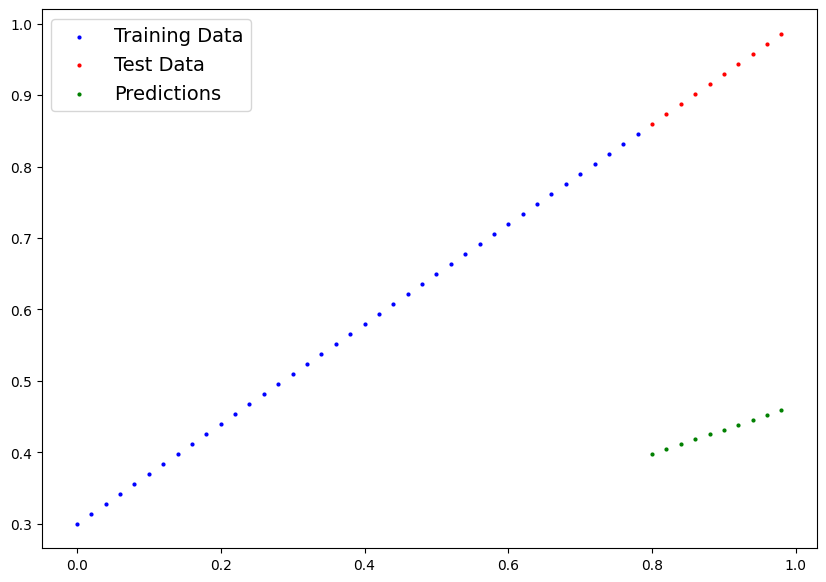

In [128]:
plot_predictions(predictions=y_preds)

# Train The Model

In [129]:
# Setup a Loss Function
loss_fn = nn.L1Loss()

# Setup an Optimizer (SGD = Stochasmic (Random) Gradeint Descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # Learning Rate - Hyperparameter -> Is instated by the user

In [130]:
torch.manual_seed(42)

epochs = 300 # Times to Loop through the data

epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):

  model_0.train()

  # Forward Pass
  y_preds = model_0(X_train)

  # Loss Function
  loss = loss_fn(y_preds, y_train)

  # Zero Grad
  optimizer.zero_grad()

  # Backward Pass
  loss.backward()

  # Optimizer Step
  optimizer.step()


  # Testing
  model_0.eval() # turns of different settings which doesnt need for testing

  with torch.inference_mode():
    # Do Forward Pass
    test_preds = model_0(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_preds, y_test)

    # Print out whats happening
    if (epoch % 10 == 0):
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss}")
      print(f"{model_0.state_dict()}")

Epoch: 0 | Test: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Test: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Test: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Test: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Test: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Test: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Test: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Test: 0.03

In [131]:
weight, bias

(0.7, 0.3)

In [132]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

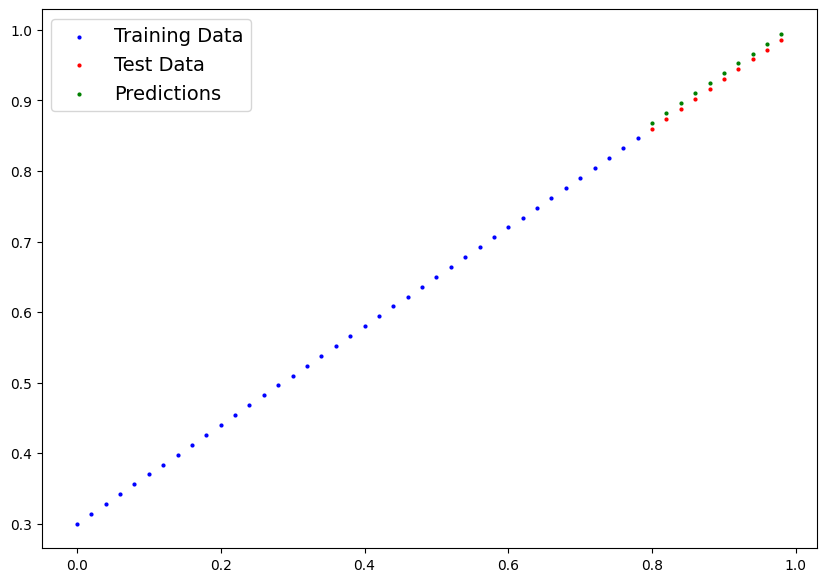

In [135]:
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

# Plot The Loss Curves

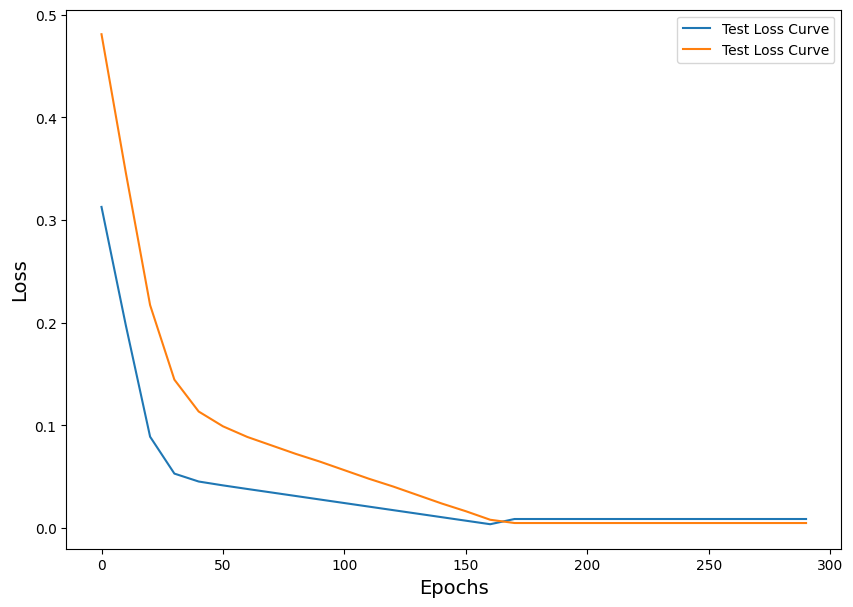

In [134]:
plt.figure(figsize = (10, 7))
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label = "Test Loss Curve")
plt.plot(epoch_count, test_loss_values, label = "Test Loss Curve")
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Loss", fontsize = 14)
plt.legend()
plt.show()

# Saving a Model

In [137]:
from pathlib import Path

# Create Model Directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents = True, exist_ok= True)

# Create Save Path
MODEL_NAME = "01_PYTORCHMODEL.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the Model
print(f"Model Saved At: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Model Saved At: Models/01_PYTORCHMODEL.pth


# Loading The Saved Model

In [141]:
loaded_model = LinearRegressionModel()

# Load the Model
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>